In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df=pd.read_csv('weight_height.csv')

In [3]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


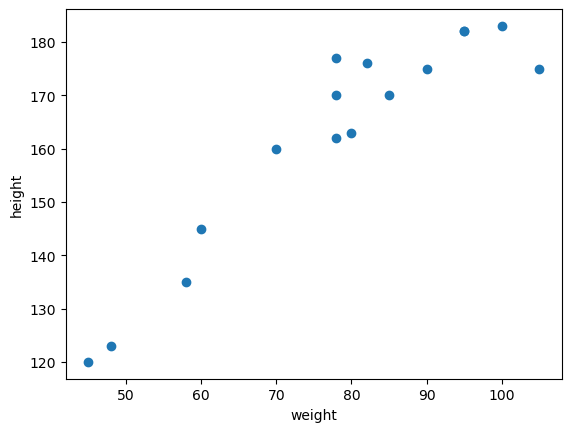

In [9]:
## scatter plot to show the relationship between independent and dependent features
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

In [12]:
#correlation
df.corr()

,Weight,Height
Weight,1.000000,0.934236
Height,0.934236,1.000000


In [14]:
# import seaborn for visualization
import seaborn as sns

In [15]:
sns.pairplot(df)

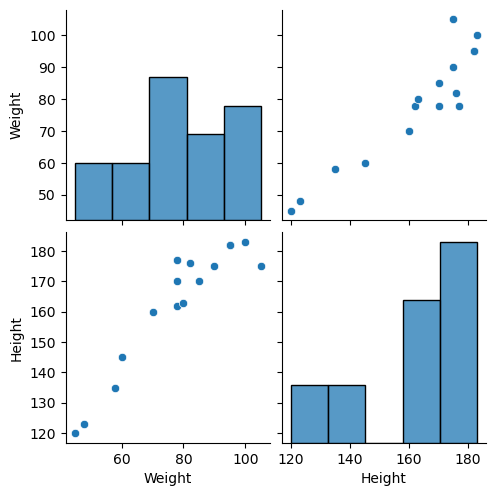

In [16]:
plt.show()

In [22]:
# independent and dependent feature
X=df[['Weight']] # independent feature should be dataframe (not in series) or 2D array like(np.array(X))
np.array(X).shape # dependent variable should be in series or in 1D array
y=df['Height']

In [23]:
X_series=df['Weight'] # independent feature should be dataframe (not in series) or 2D array like(np.array(X))
np.array(X_series).shape

(16,)

In [24]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
Name: Height, dtype: int64

In [26]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [27]:
X_train.shape

(12, 1)

# Standardization (also called z-score normalization) is a technique used to rescale the features (input variables) in your dataset so that they have certain statistical properties. Specifically, it transforms the data to have a mean of 0 and a standard deviation of 1. This process is essential for certain machine learning algorithms, especially when the features have different units or scales, like in models that rely on distance calculations (e.g., k-NN, SVMs, and linear regression).
z = (x - u)/ σ
​	
 

In [28]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [29]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)


In [30]:
X_test=scalar.transform(X_test)

In [31]:
X_test

array([[-2.29603432],
       [-1.4838317 ],
       [-0.23428922],
       [ 0.20305065]])

In [33]:
## apply simple linear rigression
from sklearn.linear_model import LinearRegression

In [35]:
regression=LinearRegression(n_jobs=-1)


In [37]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [40]:
print("coefficient or slope : ",regression.coef_)
print("intercept : ",regression.intercept_)

coefficient or slope :  [15.34724528]
intercept :  167.58333333333334


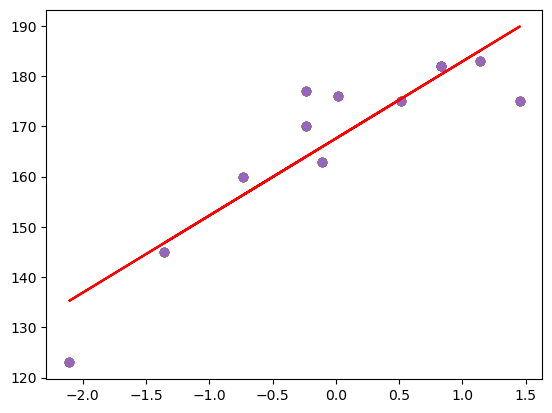

In [45]:
# plot training data best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color='red')  # Corrected this line
plt.show()



In [46]:
# predictation for test data 
y_pred=regression.predict(X_test)

# prediction of test data 
y_pred_test = 167.58 + 15.34 * (X_test)

In [47]:
y_pred

array([132.34553143, 144.81060421, 163.98763926, 170.69960153])

In [49]:
# performances matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [50]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


63.27506336142865
6.210844108319115
7.954562424258713


# R square
formula = R^2 = 1- SSR / SST

R^2 = coefficient of determination SSR =sum of squares of residual SST =total sum of squares


In [51]:
from sklearn.metrics import r2_score


In [52]:
score=r2_score(y_test,y_pred)
print(score)


0.844413552515313


# adjusted r^2 

In [53]:
# display adjusted R- squared 
1 - (1-score )* (len(y_test)-1) /(len(y_test)-X_test.shape[1]-1)

0.7666203287729696

In [54]:
# OLS linear regression
import statsmodels.api as sm 


In [55]:
model=sm.OLS(y_train,X_train).fit()

In [56]:
prediction=model.predict(X_test)
print(prediction)

[-35.2378019  -22.77272912  -3.59569407   3.1162682 ]


In [57]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.082
Method:                 Least Squares   F-statistic:                            0.09207
Date:                Fri, 28 Feb 2025   Prob (F-statistic):                       0.767
Time:                        17:24:04   Log-Likelihood:                         -78.497
No. Observations:                  12   AIC:                                      159.0
Df Residuals:                      11   BIC:                                      159.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [59]:
#prediction for new data 
regression.predict(scalar.transform([[72]]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.23452875])